# Boosting & other Supervised Machine Learning Models

##  Importing important packages and libraries

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import statistics
import warnings
from sklearn import metrics
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier  
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore')

In [3]:
df1 = pd.read_csv('D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/Updated Dataset/supervisedml_dataset.csv')
df1 = df1.drop('Unnamed: 0', axis=1)
df1

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,23,7,27.0,14.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
1,23,7,33.0,13.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
2,24,18,72.0,23.0,1.0,1,4,2,19,7,12,20,20,2,3,7,0
3,18,12,16.0,14.0,1.0,1,4,2,19,10,15,20,20,2,3,7,0
4,18,12,19.0,10.0,3.0,1,4,2,19,10,15,20,20,2,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,0,3,8,20,2,1,0,6,1
1059215,22,22,33.0,45.0,9.2,3,2,6,19,10,19,20,20,2,4,6,0
1059216,25,15,31.2,67.6,6.2,3,2,6,19,10,14,20,20,2,3,6,0
1059217,29,24,31.2,67.6,6.2,3,2,6,20,8,13,20,20,4,1,6,0


In [4]:
print("\nData size :",df1.shape)
print("\nNumber of records :",len(df1))
print("\nNumber of atrributes :",len(df1.columns))
print("\nDataset Information :", df1.info())
df1.describe()


Data size : (1059219, 17)

Number of records : 1059219

Number of atrributes : 17
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059219 entries, 0 to 1059218
Data columns (total 17 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   dev_id             1059219 non-null  int64  
 1   name               1059219 non-null  int64  
 2   total              1059219 non-null  float64
 3   left               1059219 non-null  float64
 4   left_avg           1059219 non-null  float64
 5   year               1059219 non-null  int64  
 6   month              1059219 non-null  int64  
 7   day                1059219 non-null  int64  
 8   hospitals_count    1059219 non-null  int64  
 9   libraries_count    1059219 non-null  int64  
 10  gyms_count         1059219 non-null  int64  
 11  restaurants_count  1059219 non-null  int64  
 12  malls_count        1059219 non-null  int64  
 13  postcode           1059219 non-null  int64  
 14 

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
count,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06,1.059219e+06
mean,1.351075e+01,1.386866e+01,2.640338e+01,2.581557e+01,1.501377e+00,1.876433e+00,5.475533e+00,1.493263e+01,1.395740e+01,5.876101e+00,1.256154e+01,1.897470e+01,1.363208e+01,2.018332e+00,2.827109e+00,5.010734e+00,1.333171e-01
std,7.505511e+00,9.806737e+00,4.771351e+01,6.942899e+01,4.327007e+00,6.464927e-01,3.499297e+00,8.820526e+00,8.208667e+00,3.833309e+00,5.498938e+00,3.342128e+00,8.302053e+00,1.054696e+00,1.478115e+00,2.832466e+00,4.933639e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00,2.000000e+01,3.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00
50%,1.400000e+01,1.200000e+01,7.000000e+00,4.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,1.500000e+01,1.900000e+01,8.000000e+00,1.400000e+01,2.000000e+01,2.000000e+01,2.000000e+00,3.000000e+00,7.000000e+00,0.000000e+00
75%,2.000000e+01,2.200000e+01,3.120000e+01,2.200000e+01,1.000000e+00,2.000000e+00,8.000000e+00,2.300000e+01,2.000000e+01,9.000000e+00,1.700000e+01,2.000000e+01,2.000000e+01,2.000000e+00,4.000000e+00,7.000000e+00,0.000000e+00
max,3.100000e+01,3.000000e+01,5.000000e+02,1.448000e+03,6.233000e+02,3.000000e+00,1.100000e+01,3.000000e+01,2.000000e+01,1.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,5.000000e+00,6.000000e+00,7.000000e+00,2.000000e+00


In [5]:
#check if there are any missing values in the dataframe?
print(" \nCount total number of missing values in the DataFrame : \n\n", df1.isnull().sum().sum())

 
Count total number of missing values in the DataFrame : 

 0


<AxesSubplot:>

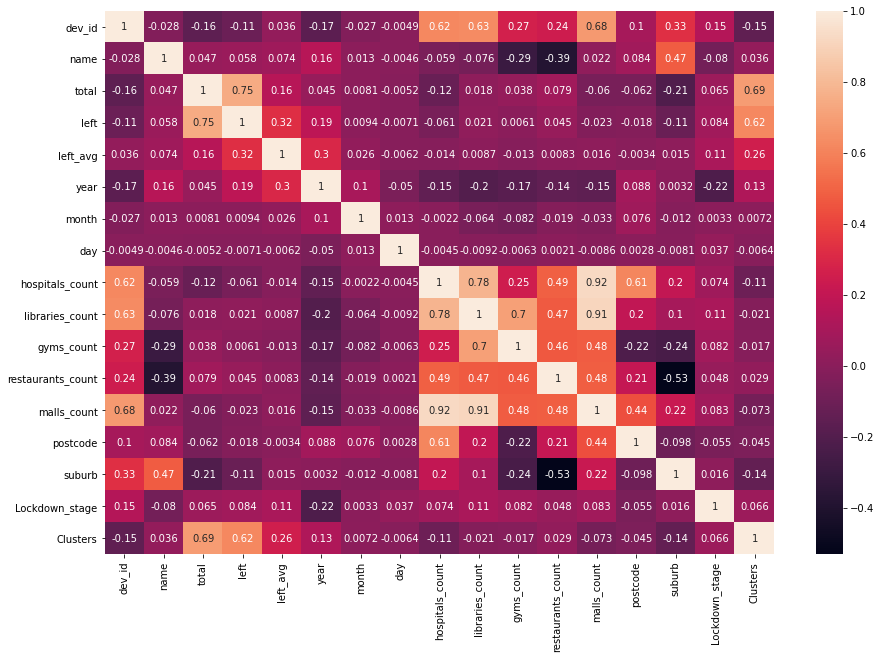

In [6]:
#Correlation matrix
df1.corr()

#Correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot = True)

In [7]:
# Checking unique values of 'Clusters'
df1['Clusters'].value_counts()

0    985725
2     67718
1      5776
Name: Clusters, dtype: int64

In [8]:
data = df1.copy()

In [9]:
data

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,23,7,27.0,14.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
1,23,7,33.0,13.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
2,24,18,72.0,23.0,1.0,1,4,2,19,7,12,20,20,2,3,7,0
3,18,12,16.0,14.0,1.0,1,4,2,19,10,15,20,20,2,3,7,0
4,18,12,19.0,10.0,3.0,1,4,2,19,10,15,20,20,2,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,0,3,8,20,2,1,0,6,1
1059215,22,22,33.0,45.0,9.2,3,2,6,19,10,19,20,20,2,4,6,0
1059216,25,15,31.2,67.6,6.2,3,2,6,19,10,14,20,20,2,3,6,0
1059217,29,24,31.2,67.6,6.2,3,2,6,20,8,13,20,20,4,1,6,0


In [10]:
data['Clusters'].value_counts()

0    985725
2     67718
1      5776
Name: Clusters, dtype: int64

In [11]:
# Preprocessing
# Splitting data into features and target variable

X = data # Features variable
y = data['Clusters'] # Target variable

In [12]:
X

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,23,7,27.0,14.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
1,23,7,33.0,13.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
2,24,18,72.0,23.0,1.0,1,4,2,19,7,12,20,20,2,3,7,0
3,18,12,16.0,14.0,1.0,1,4,2,19,10,15,20,20,2,3,7,0
4,18,12,19.0,10.0,3.0,1,4,2,19,10,15,20,20,2,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059214,12,11,202.0,494.0,13.9,3,2,6,0,3,8,20,2,1,0,6,1
1059215,22,22,33.0,45.0,9.2,3,2,6,19,10,19,20,20,2,4,6,0
1059216,25,15,31.2,67.6,6.2,3,2,6,19,10,14,20,20,2,3,6,0
1059217,29,24,31.2,67.6,6.2,3,2,6,20,8,13,20,20,4,1,6,0


In [13]:
y

0          0
1          0
2          0
3          0
4          0
          ..
1059214    1
1059215    0
1059216    0
1059217    0
1059218    0
Name: Clusters, Length: 1059219, dtype: int64

In [14]:
X.shape, y.shape

((1059219, 17), (1059219,))

In [15]:
X_1_2 = X[X['Clusters'] != 0]

y_1_2 = y[y != 0]

In [16]:
X_1_2

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
558,24,18,93.0,102.0,1.0,1,4,6,19,7,12,20,20,2,3,7,2
2031,18,12,84.0,98.0,1.0,1,4,17,19,10,15,20,20,2,3,7,2
2033,18,12,94.0,90.0,1.0,1,4,17,19,10,15,20,20,2,3,7,2
2371,23,7,57.0,95.0,1.0,1,4,19,20,9,14,20,20,2,4,7,2
2391,18,12,64.0,89.0,1.0,1,4,20,19,10,15,20,20,2,3,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059187,0,3,100.0,255.0,10.9,3,2,6,0,3,20,20,2,1,0,6,2
1059191,22,22,57.0,134.0,12.2,3,2,6,19,10,19,20,20,2,4,6,2
1059199,23,7,74.0,139.0,15.0,3,2,6,20,9,14,20,20,2,4,6,2
1059205,12,11,297.0,795.0,12.2,3,2,6,0,3,8,20,2,1,0,6,1


In [17]:
y_1_2

558        2
2031       2
2033       2
2371       2
2391       2
          ..
1059187    2
1059191    2
1059199    2
1059205    1
1059214    1
Name: Clusters, Length: 73494, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_1_2, y_1_2, test_size=0.3, random_state=1) # 70% training and 30% test

In [19]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (51445, 17)
X_test shape  is :  (22049, 17)
y_train shape is :  (51445,)
y_test shape is  :  (22049,)


In [20]:
print('Original dataset shape %s' % Counter(y_train.values.ravel()))

Original dataset shape Counter({2: 47373, 1: 4072})


## Using SMOTE

In [21]:
# Implement SMOTE
over = SMOTE(random_state = 100)
X_train_resampled, y_train_resampled = over.fit_resample(X_train, y_train)
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_resampled)))

Original dataset shape Counter({2: 47373, 1: 4072})
Resampled dataset shape Counter({2: 47373, 1: 47373})


In [22]:
X_train_resampled

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,1,1,212.000000,132.000000,0.000000,1,2,22,0,3,20,20,4,1,0,7,2
1,8,13,168.000000,196.000000,0.000000,1,9,15,20,10,14,20,20,2,3,7,2
2,0,3,78.000000,102.000000,10.100000,3,0,9,0,3,20,20,2,1,0,7,2
3,11,27,107.000000,403.000000,9.300000,2,9,5,20,8,13,20,20,4,1,7,2
4,12,11,289.000000,193.000000,0.000000,2,1,2,0,3,8,20,2,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94741,8,13,245.570500,545.285250,12.928958,3,5,18,20,10,14,20,20,2,3,7,1
94742,8,15,153.611641,616.165077,9.396120,2,5,13,20,9,13,20,20,2,2,7,1
94743,10,27,176.000000,478.353858,11.344770,3,0,11,19,6,11,20,19,4,1,5,1
94744,8,13,206.010640,499.007093,13.299468,3,5,10,20,10,14,20,20,2,3,6,1


In [23]:
y_train_resampled

0        2
1        2
2        2
3        2
4        2
        ..
94741    1
94742    1
94743    1
94744    1
94745    1
Name: Clusters, Length: 94746, dtype: int64

## Taking X & Y Cluster values as 0 and 2


In [24]:
X_0_2 = X[X['Clusters'] != 1]

y_0_2 = y[y != 1]

In [25]:
X_0_2

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,23,7,27.0,14.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
1,23,7,33.0,13.0,1.0,1,4,2,20,9,14,20,20,2,4,7,0
2,24,18,72.0,23.0,1.0,1,4,2,19,7,12,20,20,2,3,7,0
3,18,12,16.0,14.0,1.0,1,4,2,19,10,15,20,20,2,3,7,0
4,18,12,19.0,10.0,3.0,1,4,2,19,10,15,20,20,2,3,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059213,7,23,0.0,0.0,0.0,3,2,6,2,0,1,1,0,3,6,6,0
1059215,22,22,33.0,45.0,9.2,3,2,6,19,10,19,20,20,2,4,6,0
1059216,25,15,31.2,67.6,6.2,3,2,6,19,10,14,20,20,2,3,6,0
1059217,29,24,31.2,67.6,6.2,3,2,6,20,8,13,20,20,4,1,6,0


In [26]:
y_0_2

0          0
1          0
2          0
3          0
4          0
          ..
1059213    0
1059215    0
1059216    0
1059217    0
1059218    0
Name: Clusters, Length: 1053443, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_0_2, y_0_2, test_size=0.3, random_state=1) # 70% training and 30% test

In [28]:
# Check the shape of all of these
print("X_train shape is : ", X_train_new.shape)
print("X_test shape  is : ", X_test_new.shape)
print("y_train shape is : ", y_train_new.shape)
print("y_test shape is  : ", y_test_new.shape)

X_train shape is :  (737410, 17)
X_test shape  is :  (316033, 17)
y_train shape is :  (737410,)
y_test shape is  :  (316033,)


In [29]:
print('Original dataset shape %s' % Counter(y_train_new.values.ravel()))

Original dataset shape Counter({0: 690104, 2: 47306})


## Using RandomUnderSampler

In [30]:
# Undersampling
under = RandomUnderSampler(sampling_strategy='majority')
X_new, y_new = under.fit_resample(X_train_new, y_train_new)
print('Original dataset shape {}'.format(Counter(y_train_new)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 690104, 2: 47306})
Resampled dataset shape Counter({0: 47306, 2: 47306})


In [31]:
X_new

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,0,3,30.0,18.0,1.0,2,6,23,0,3,20,20,2,1,0,7,0
1,22,22,3.0,1.0,0.0,2,8,18,19,10,19,20,20,2,4,7,0
2,24,18,2.0,0.0,0.0,2,0,10,19,7,12,20,20,2,3,0,0
3,7,23,0.0,1.0,2.5,2,9,4,2,0,1,1,0,3,6,7,0
4,27,25,31.2,67.6,6.2,3,9,6,19,7,17,20,19,4,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94607,11,27,176.0,407.0,10.5,3,5,3,20,8,13,20,20,4,1,7,2
94608,1,1,177.0,170.0,1.0,2,4,3,0,3,20,20,4,1,0,7,2
94609,11,27,123.0,111.0,1.0,2,7,14,20,8,13,20,20,4,1,7,2
94610,24,18,95.0,127.0,35.0,3,2,6,19,7,12,20,20,2,3,6,2


In [32]:
y_new

0        0
1        0
2        0
3        0
4        0
        ..
94607    2
94608    2
94609    2
94610    2
94611    2
Name: Clusters, Length: 94612, dtype: int64

In [33]:
X_new['Clusters'].value_counts()

0    47306
2    47306
Name: Clusters, dtype: int64

In [34]:
X_train_resampled['Clusters'].value_counts()

1    47373
2    47373
Name: Clusters, dtype: int64

In [35]:
M = X_new.append(X_train_resampled[X_train_resampled['Clusters'] != 2])

In [36]:
M

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,Clusters
0,0,3,30.000000,18.000000,1.000000,2,6,23,0,3,20,20,2,1,0,7,0
1,22,22,3.000000,1.000000,0.000000,2,8,18,19,10,19,20,20,2,4,7,0
2,24,18,2.000000,0.000000,0.000000,2,0,10,19,7,12,20,20,2,3,0,0
3,7,23,0.000000,1.000000,2.500000,2,9,4,2,0,1,1,0,3,6,7,0
4,27,25,31.200000,67.600000,6.200000,3,9,6,19,7,17,20,19,4,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94741,8,13,245.570500,545.285250,12.928958,3,5,18,20,10,14,20,20,2,3,7,1
94742,8,15,153.611641,616.165077,9.396120,2,5,13,20,9,13,20,20,2,2,7,1
94743,10,27,176.000000,478.353858,11.344770,3,0,11,19,6,11,20,19,4,1,5,1
94744,8,13,206.010640,499.007093,13.299468,3,5,10,20,10,14,20,20,2,3,6,1


In [37]:
M.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141985 entries, 0 to 94745
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dev_id             141985 non-null  int64  
 1   name               141985 non-null  int64  
 2   total              141985 non-null  float64
 3   left               141985 non-null  float64
 4   left_avg           141985 non-null  float64
 5   year               141985 non-null  int64  
 6   month              141985 non-null  int64  
 7   day                141985 non-null  int64  
 8   hospitals_count    141985 non-null  int64  
 9   libraries_count    141985 non-null  int64  
 10  gyms_count         141985 non-null  int64  
 11  restaurants_count  141985 non-null  int64  
 12  malls_count        141985 non-null  int64  
 13  postcode           141985 non-null  int64  
 14  suburb             141985 non-null  int64  
 15  Lockdown_stage     141985 non-null  int64  
 16  Clu

In [38]:
M['Clusters'].value_counts()

1    47373
0    47306
2    47306
Name: Clusters, dtype: int64

In [39]:
N = y_new.append(y_train_resampled[y_train_resampled!= 2])

In [40]:
N

0        0
1        0
2        0
3        0
4        0
        ..
94741    1
94742    1
94743    1
94744    1
94745    1
Name: Clusters, Length: 141985, dtype: int64

In [41]:
N.value_counts()

1    47373
0    47306
2    47306
Name: Clusters, dtype: int64

In [42]:
df2 = M.copy()

In [43]:
# Series to Supervised conversion

def series_to_supervised(data,n_in=1,n_out=1,dropnan = True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = pd.concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [44]:
# Feature set and Target Variable Creation
dataset = df2
dataset = series_to_supervised(dataset)
data = pd.DataFrame(dataset)

In [45]:
data

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,3.0,30.000000,18.000000,1.000000,2.0,6.0,23.0,0.0,3.0,...,18.0,19.0,10.0,19.0,20.0,20.0,2.0,4.0,7.0,0.0
1,22.0,22.0,3.000000,1.000000,0.000000,2.0,8.0,18.0,19.0,10.0,...,10.0,19.0,7.0,12.0,20.0,20.0,2.0,3.0,0.0,0.0
2,24.0,18.0,2.000000,0.000000,0.000000,2.0,0.0,10.0,19.0,7.0,...,4.0,2.0,0.0,1.0,1.0,0.0,3.0,6.0,7.0,0.0
3,7.0,23.0,0.000000,1.000000,2.500000,2.0,9.0,4.0,2.0,0.0,...,6.0,19.0,7.0,17.0,20.0,19.0,4.0,3.0,6.0,0.0
4,27.0,25.0,31.200000,67.600000,6.200000,3.0,9.0,6.0,19.0,7.0,...,22.0,0.0,3.0,20.0,20.0,2.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141979,8.0,16.0,334.373956,1173.175626,8.072521,2.0,6.0,12.0,20.0,9.0,...,18.0,20.0,10.0,14.0,20.0,20.0,2.0,3.0,7.0,1.0
141980,8.0,13.0,245.570500,545.285250,12.928958,3.0,5.0,18.0,20.0,10.0,...,13.0,20.0,9.0,13.0,20.0,20.0,2.0,2.0,7.0,1.0
141981,8.0,15.0,153.611641,616.165077,9.396120,2.0,5.0,13.0,20.0,9.0,...,11.0,19.0,6.0,11.0,20.0,19.0,4.0,1.0,5.0,1.0
141982,10.0,27.0,176.000000,478.353858,11.344770,3.0,0.0,11.0,19.0,6.0,...,10.0,20.0,10.0,14.0,20.0,20.0,2.0,3.0,6.0,1.0


In [46]:
data[16].value_counts()

1.0    47372
0.0    47306
2.0    47306
Name: 16, dtype: int64

In [47]:
data[33].value_counts()

1.0    47373
2.0    47306
0.0    47305
Name: 33, dtype: int64

In [48]:
data1 = data.drop([16,33], axis=1)
data1

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,3.0,30.000000,18.000000,1.000000,2.0,6.0,23.0,0.0,3.0,...,8.0,18.0,19.0,10.0,19.0,20.0,20.0,2.0,4.0,7.0
1,22.0,22.0,3.000000,1.000000,0.000000,2.0,8.0,18.0,19.0,10.0,...,0.0,10.0,19.0,7.0,12.0,20.0,20.0,2.0,3.0,0.0
2,24.0,18.0,2.000000,0.000000,0.000000,2.0,0.0,10.0,19.0,7.0,...,9.0,4.0,2.0,0.0,1.0,1.0,0.0,3.0,6.0,7.0
3,7.0,23.0,0.000000,1.000000,2.500000,2.0,9.0,4.0,2.0,0.0,...,9.0,6.0,19.0,7.0,17.0,20.0,19.0,4.0,3.0,6.0
4,27.0,25.0,31.200000,67.600000,6.200000,3.0,9.0,6.0,19.0,7.0,...,0.0,22.0,0.0,3.0,20.0,20.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141979,8.0,16.0,334.373956,1173.175626,8.072521,2.0,6.0,12.0,20.0,9.0,...,5.0,18.0,20.0,10.0,14.0,20.0,20.0,2.0,3.0,7.0
141980,8.0,13.0,245.570500,545.285250,12.928958,3.0,5.0,18.0,20.0,10.0,...,5.0,13.0,20.0,9.0,13.0,20.0,20.0,2.0,2.0,7.0
141981,8.0,15.0,153.611641,616.165077,9.396120,2.0,5.0,13.0,20.0,9.0,...,0.0,11.0,19.0,6.0,11.0,20.0,19.0,4.0,1.0,5.0
141982,10.0,27.0,176.000000,478.353858,11.344770,3.0,0.0,11.0,19.0,6.0,...,5.0,10.0,20.0,10.0,14.0,20.0,20.0,2.0,3.0,6.0


In [49]:
# Preprocessing
# Splitting data into features and target variable

X1 = data1 # Features
y1 = data[33] # Target variable

In [50]:
X1

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,3.0,30.000000,18.000000,1.000000,2.0,6.0,23.0,0.0,3.0,...,8.0,18.0,19.0,10.0,19.0,20.0,20.0,2.0,4.0,7.0
1,22.0,22.0,3.000000,1.000000,0.000000,2.0,8.0,18.0,19.0,10.0,...,0.0,10.0,19.0,7.0,12.0,20.0,20.0,2.0,3.0,0.0
2,24.0,18.0,2.000000,0.000000,0.000000,2.0,0.0,10.0,19.0,7.0,...,9.0,4.0,2.0,0.0,1.0,1.0,0.0,3.0,6.0,7.0
3,7.0,23.0,0.000000,1.000000,2.500000,2.0,9.0,4.0,2.0,0.0,...,9.0,6.0,19.0,7.0,17.0,20.0,19.0,4.0,3.0,6.0
4,27.0,25.0,31.200000,67.600000,6.200000,3.0,9.0,6.0,19.0,7.0,...,0.0,22.0,0.0,3.0,20.0,20.0,2.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141979,8.0,16.0,334.373956,1173.175626,8.072521,2.0,6.0,12.0,20.0,9.0,...,5.0,18.0,20.0,10.0,14.0,20.0,20.0,2.0,3.0,7.0
141980,8.0,13.0,245.570500,545.285250,12.928958,3.0,5.0,18.0,20.0,10.0,...,5.0,13.0,20.0,9.0,13.0,20.0,20.0,2.0,2.0,7.0
141981,8.0,15.0,153.611641,616.165077,9.396120,2.0,5.0,13.0,20.0,9.0,...,0.0,11.0,19.0,6.0,11.0,20.0,19.0,4.0,1.0,5.0
141982,10.0,27.0,176.000000,478.353858,11.344770,3.0,0.0,11.0,19.0,6.0,...,5.0,10.0,20.0,10.0,14.0,20.0,20.0,2.0,3.0,6.0


In [51]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141984 entries, 0 to 141983
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       141984 non-null  float64
 1   1       141984 non-null  float64
 2   2       141984 non-null  float64
 3   3       141984 non-null  float64
 4   4       141984 non-null  float64
 5   5       141984 non-null  float64
 6   6       141984 non-null  float64
 7   7       141984 non-null  float64
 8   8       141984 non-null  float64
 9   9       141984 non-null  float64
 10  10      141984 non-null  float64
 11  11      141984 non-null  float64
 12  12      141984 non-null  float64
 13  13      141984 non-null  float64
 14  14      141984 non-null  float64
 15  15      141984 non-null  float64
 16  17      141984 non-null  float64
 17  18      141984 non-null  float64
 18  19      141984 non-null  float64
 19  20      141984 non-null  float64
 20  21      141984 non-null  float64
 21  22      14

In [52]:
y1

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
141979    1.0
141980    1.0
141981    1.0
141982    1.0
141983    1.0
Name: 33, Length: 141984, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size=0.3, random_state=1) # 70% training and 30% test

In [54]:
# Check the shape of all of these
print("X1_train shape is : ", X1_train.shape)
print("X1_test shape  is : ", X1_test.shape)
print("y1_train shape is : ", y1_train.shape)
print("y1_test shape is  : ", y1_test.shape)

X1_train shape is :  (99388, 32)
X1_test shape  is :  (42596, 32)
y1_train shape is :  (99388,)
y1_test shape is  :  (42596,)


In [55]:
print('Original dataset shape %s' % Counter(y1_train.values.ravel()))

Original dataset shape Counter({2.0: 33187, 1.0: 33181, 0.0: 33020})


## Random Forest

In [56]:
# Best Random Forest Model

rfclf = RandomForestClassifier(bootstrap=True, max_depth=2, min_samples_leaf=5, n_estimators=100)
rfclf.fit(X1_train,y1_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=5)

In [57]:
# Predicted Outcome
n_pred = rfclf.predict(X1_test)

In [58]:
print('Random Forest')
print(confusion_matrix(y1_test,n_pred))
print(classification_report(y1_test,n_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, n_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y1_test, n_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y1_test, n_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y1_test, n_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y1_test, n_pred))


Random Forest
[[14236     0    49]
 [    0 14192     0]
 [    1     0 14118]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14285
         1.0       1.00      1.00      1.00     14192
         2.0       1.00      1.00      1.00     14119

    accuracy                           1.00     42596
   macro avg       1.00      1.00      1.00     42596
weighted avg       1.00      1.00      1.00     42596

Accuracy: 0.9988261808620528
Precision: 0.99882999925172
Recall: 0.9988261808620528
F1 Score: 0.99882618910292
Mean Absolute Error: 0.00234763827589445


## Decision Tree

In [60]:
# Best Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtclf = DecisionTreeClassifier(splitter='random', max_depth=3, min_samples_leaf=5, 
                               min_samples_split=20, criterion="entropy")
dtclf.fit(X1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       min_samples_split=20, splitter='random')

In [61]:
# Predicted Outcome
dt_pred = dtclf.predict(X1_test)

In [62]:
print('Decision Tree')
print(confusion_matrix(y1_test,dt_pred))
print(classification_report(y1_test,dt_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, dt_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y1_test, dt_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y1_test, dt_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y1_test, dt_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y1_test, dt_pred))

Decision Tree
[[13813     0   472]
 [    5 14146    41]
 [ 4816  2527  6776]]
              precision    recall  f1-score   support

         0.0       0.74      0.97      0.84     14285
         1.0       0.85      1.00      0.92     14192
         2.0       0.93      0.48      0.63     14119

    accuracy                           0.82     42596
   macro avg       0.84      0.81      0.80     42596
weighted avg       0.84      0.82      0.80     42596

Accuracy: 0.8154521551319373
Precision: 0.8394099617332361
Recall: 0.8154521551319373
F1 Score: 0.7966677402626771
Mean Absolute Error: 0.30869095689736126


## SVM

In [64]:
# Best Support Vector Machine Model
from sklearn.svm import SVC
svmclf = SVC(kernel='rbf', C=10, gamma=0.001)
svmclf.fit(X1_train,y1_train)

SVC(C=10, gamma=0.001)

In [65]:
# Predicted Outcome
svm_pred = svmclf.predict(X1_test)

In [66]:
print('Support Vector Machine (SVM)')
print(confusion_matrix(y1_test,svm_pred))
print(classification_report(y1_test,svm_pred))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, svm_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y1_test, svm_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y1_test, svm_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y1_test, svm_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y1_test, svm_pred))

Support Vector Machine (SVM)
[[14257    25     3]
 [    0 14192     0]
 [    0    90 14029]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14285
         1.0       0.99      1.00      1.00     14192
         2.0       1.00      0.99      1.00     14119

    accuracy                           1.00     42596
   macro avg       1.00      1.00      1.00     42596
weighted avg       1.00      1.00      1.00     42596

Accuracy: 0.9972297868344445
Precision: 0.9972510510926524
Recall: 0.9972297868344445
F1 Score: 0.9972315378060902
Mean Absolute Error: 0.002840642313832285


## KNN

In [68]:
# Best K-Nearest Neighbours Model
from sklearn.neighbors import KNeighborsClassifier  
knnclf = KNeighborsClassifier(n_neighbors = 12, weights = 'uniform', metric = 'manhattan')  
knnclf.fit(X1_train,y1_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=12)

In [69]:
# Predicted Outcome
knn_pred = knnclf.predict(X1_test)

In [70]:
print('K-Nearest Neighbours (KNN)')
print(confusion_matrix(y1_test,knn_pred))
print(classification_report(y1_test,knn_pred))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, knn_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y1_test, knn_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y1_test, knn_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y1_test, knn_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y1_test, knn_pred))

K-Nearest Neighbours (KNN)
[[14275     0    10]
 [    0 14192     0]
 [    0     5 14114]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14285
         1.0       1.00      1.00      1.00     14192
         2.0       1.00      1.00      1.00     14119

    accuracy                           1.00     42596
   macro avg       1.00      1.00      1.00     42596
weighted avg       1.00      1.00      1.00     42596

Accuracy: 0.9996478542586158
Precision: 0.9996479787071331
Recall: 0.9996478542586158
F1 Score: 0.9996478546664883
Mean Absolute Error: 0.0005869095689736125


## XGBoost

In [72]:
# Best XGBoost Model
from xgboost import XGBClassifier  
xgbclf = XGBClassifier(booster='gbtree',learning_rate =0.1,max_depth=5,min_child_weight= 3,
                       sampling_method='uniform', n_estimators=8)  
xgbclf.fit(X1_train,y1_train)

[00:09:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=8, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, sampling_method='uniform', scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [73]:
# Predicted Outcome
xgb_pred = xgbclf.predict(X1_test)

In [74]:
print('XGBoost')
print(confusion_matrix(y1_test,xgb_pred))
print(classification_report(y1_test,xgb_pred))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y1_test, xgb_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y1_test, xgb_pred, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y1_test, xgb_pred, average='weighted'))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y1_test, xgb_pred, average='weighted'))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y1_test, xgb_pred))

XGBoost
[[14285     0     0]
 [    0 14192     0]
 [    1     1 14117]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     14285
         1.0       1.00      1.00      1.00     14192
         2.0       1.00      1.00      1.00     14119

    accuracy                           1.00     42596
   macro avg       1.00      1.00      1.00     42596
weighted avg       1.00      1.00      1.00     42596

Accuracy: 0.9999530472344821
Precision: 0.9999530505318778
Recall: 0.9999530472344821
F1 Score: 0.9999530463959913
Mean Absolute Error: 7.04291482768335e-05


## Prediction on 6th & 7th Dec 2021 Wi-Fi dataset using the best ML model (Random Forest)

In [75]:
col_list = ["dev_id", "name", "total", "left", "left_avg", "year", "month", "day",
            "hospitals_count", "libraries_count", "gyms_count", "restaurants_count", "malls_count",
            "postcode", "suburb", "latitude", "longitude", "Lockdown_stage"]
df_latest = pd.read_csv('D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/Updated Dataset/dec_latest_data_new.csv', usecols=col_list)
df_latest

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
0,014d9b,smart node 7,104.0,211.0,11.2,2021.0,Dec,6.0,-38.146934,144.371125,17,4,6,20,16,3220,Geelong,Open
1,014d9e,Botanical Gardens - conservatory entrance,0.0,0.0,0.0,2021.0,Dec,6.0,-38.149437,144.377461,16,0,2,20,3,3219,East Geelong,Open
2,014da2,Rippleside Park,18.0,35.0,16.7,2021.0,Dec,6.0,-38.114949,144.672566,0,0,0,1,0,3223,Geelong CBD,Open
3,014dbe,St Albans reserve rotunda,1.0,0.0,0.0,2021.0,Dec,6.0,-38.186146,144.393875,2,0,1,1,0,3219,St Albans Park,Open
4,014ddd,smart node 6,0.0,0.0,0.0,2021.0,Dec,6.0,-38.146705,144.368400,18,5,10,20,18,3220,Geelong,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,014de9,"High Street , Belmont wifi/cctv cabinet",202.0,494.0,13.9,2021.0,Dec,7.0,-38.174614,144.343068,0,3,8,20,2,3216,Belmont,Open
705,hawk-013a33,Ryrie/Moorabool Outside,33.0,45.0,9.2,2021.0,Dec,7.0,-38.148916,144.358449,19,10,19,20,20,3218,Geelong CBD,Open
706,meraki-e0-cb-bc-35-ae-29,Lt Malop West,31.2,67.6,6.2,2021.0,Dec,7.0,-38.147929,144.358854,19,10,14,20,20,3218,Geelong,Open
707,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,31.2,67.6,6.2,2021.0,Dec,7.0,-38.143364,144.361926,20,8,13,20,20,3220,Cunningham Pier,Open


In [76]:
df_latest2 = df_latest.drop(['latitude','longitude'], axis=1)

In [77]:
df_latest2

,dev_id,name,total,left,left_avg,year,month,day,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage
0,014d9b,smart node 7,104.0,211.0,11.2,2021.0,Dec,6.0,17,4,6,20,16,3220,Geelong,Open
1,014d9e,Botanical Gardens - conservatory entrance,0.0,0.0,0.0,2021.0,Dec,6.0,16,0,2,20,3,3219,East Geelong,Open
2,014da2,Rippleside Park,18.0,35.0,16.7,2021.0,Dec,6.0,0,0,0,1,0,3223,Geelong CBD,Open
3,014dbe,St Albans reserve rotunda,1.0,0.0,0.0,2021.0,Dec,6.0,2,0,1,1,0,3219,St Albans Park,Open
4,014ddd,smart node 6,0.0,0.0,0.0,2021.0,Dec,6.0,18,5,10,20,18,3220,Geelong,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,014de9,"High Street , Belmont wifi/cctv cabinet",202.0,494.0,13.9,2021.0,Dec,7.0,0,3,8,20,2,3216,Belmont,Open
705,hawk-013a33,Ryrie/Moorabool Outside,33.0,45.0,9.2,2021.0,Dec,7.0,19,10,19,20,20,3218,Geelong CBD,Open
706,meraki-e0-cb-bc-35-ae-29,Lt Malop West,31.2,67.6,6.2,2021.0,Dec,7.0,19,10,14,20,20,3218,Geelong,Open
707,meraki-e0-cb-bc-35-bb-14,Waterfront - Pier,31.2,67.6,6.2,2021.0,Dec,7.0,20,8,13,20,20,3220,Cunningham Pier,Open


In [78]:
# Performing label encoding on required features
from sklearn import preprocessing

categ = ['dev_id', 'name', 'month', 'day', 'year', 'postcode', 'Lockdown_stage', 'suburb']

label_encoder = preprocessing.LabelEncoder()

df_latest2[categ] = df_latest2[categ].apply(label_encoder.fit_transform)

In [79]:
# Feature set and Target Variable Creation
dataset_test = df_latest2
dataset_test = series_to_supervised(dataset_test)
data_test = pd.DataFrame(dataset_test)

In [80]:
data_test

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.0,21.0,104.0,211.0,11.2,0.0,0.0,0.0,17.0,4.0,...,0.0,0.0,16.0,0.0,2.0,20.0,3.0,3.0,2.0,0.0
1,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,0.0
2,3.0,13.0,18.0,35.0,16.7,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,1.0,1.0,0.0,3.0,6.0,0.0
3,5.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,18.0,5.0,10.0,20.0,18.0,4.0,3.0,0.0
4,8.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,5.0,...,0.0,0.0,19.0,7.0,12.0,20.0,20.0,2.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,5.0,15.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,1.0,0.0,3.0,8.0,20.0,2.0,1.0,0.0,0.0
704,10.0,7.0,202.0,494.0,13.9,0.0,0.0,1.0,0.0,3.0,...,0.0,1.0,19.0,10.0,19.0,20.0,20.0,2.0,4.0,0.0
705,14.0,14.0,33.0,45.0,9.2,0.0,0.0,1.0,19.0,10.0,...,0.0,1.0,19.0,10.0,14.0,20.0,20.0,2.0,3.0,0.0
706,17.0,10.0,31.2,67.6,6.2,0.0,0.0,1.0,19.0,10.0,...,0.0,1.0,20.0,8.0,13.0,20.0,20.0,4.0,1.0,0.0


In [81]:
# check if there are any missing values in the dataframe?
print(" \nCount total number of missing values in the DataFrame : \n\n", data_test.isnull().sum().sum())

 
Count total number of missing values in the DataFrame : 

 0


In [82]:
data_test[7].value_counts()

0.0    541
1.0    167
Name: 7, dtype: int64

In [83]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       708 non-null    float64
 1   1       708 non-null    float64
 2   2       708 non-null    float64
 3   3       708 non-null    float64
 4   4       708 non-null    float64
 5   5       708 non-null    float64
 6   6       708 non-null    float64
 7   7       708 non-null    float64
 8   8       708 non-null    float64
 9   9       708 non-null    float64
 10  10      708 non-null    float64
 11  11      708 non-null    float64
 12  12      708 non-null    float64
 13  13      708 non-null    float64
 14  14      708 non-null    float64
 15  15      708 non-null    float64
 16  16      708 non-null    float64
 17  17      708 non-null    float64
 18  18      708 non-null    float64
 19  19      708 non-null    float64
 20  20      708 non-null    float64
 21  21      708 non-null    float64
 22  22

In [84]:
L_test = data_test

In [85]:
# Predicted Outcome
l_pred = rfclf.predict(L_test)

In [86]:
df_latest = df_latest[:-1]

In [87]:
df_latest['pred'] = l_pred

df_latest.sort_values

df_latest.sort_values(['pred'], ascending=[False]).head(18)

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,pred
0,014d9b,smart node 7,104.0,211.0,11.2,2021.0,Dec,6.0,-38.146934,144.371125,17,4,6,20,16,3220,Geelong,Open,2.0
611,014ddd,smart node 6,0.0,0.0,0.0,2021.0,Dec,7.0,-38.146705,144.368400,18,5,10,20,18,3220,Geelong,Open,2.0
162,014dc6,Little Malop and James - CCTV/wifi cabinet,52.0,91.0,10.1,2021.0,Dec,6.0,-38.147928,144.358838,20,10,14,20,20,3218,Geelong,Open,2.0
610,014dc6,Little Malop and James - CCTV/wifi cabinet,346.0,818.0,10.2,2021.0,Dec,7.0,-38.147928,144.358838,20,10,14,20,20,3218,Geelong,Open,2.0
609,014da2,Rippleside Park,20.0,30.0,12.0,2021.0,Dec,7.0,-38.114949,144.672566,0,0,0,1,0,3223,Geelong CBD,Open,2.0
607,014d9b,smart node 7,58.0,95.0,13.2,2021.0,Dec,7.0,-38.146934,144.371125,17,4,6,20,16,3220,Geelong,Open,2.0
606,meraki-e0-cb-bc-35-b1-1a,Eastern Beach,31.2,67.6,6.2,2021.0,Dec,7.0,-38.147308,144.373781,13,2,6,20,16,3220,Geelong,Open,2.0
604,hawk-013a1f,Botanical Gardens - Heritage gate,8.0,15.0,4.1,2021.0,Dec,7.0,-38.149312,144.377058,13,0,3,20,6,3219,East Geelong,Open,2.0
602,014dc6,Little Malop and James - CCTV/wifi cabinet,241.0,537.0,11.5,2021.0,Dec,7.0,-38.147928,144.358838,20,10,14,20,20,3218,Geelong,Open,2.0
601,014db4,rippleside north end near gym,17.0,47.0,16.0,2021.0,Dec,7.0,-38.127440,144.354958,0,0,8,16,3,3215,Rippleside,Open,2.0


In [88]:
df_latest['pred'].value_counts()

0.0    526
2.0    182
Name: pred, dtype: int64

In [89]:
df_latest

,dev_id,name,total,left,left_avg,year,month,day,latitude,longitude,hospitals_count,libraries_count,gyms_count,restaurants_count,malls_count,postcode,suburb,Lockdown_stage,pred
0,014d9b,smart node 7,104.0,211.0,11.2,2021.0,Dec,6.0,-38.146934,144.371125,17,4,6,20,16,3220,Geelong,Open,2.0
1,014d9e,Botanical Gardens - conservatory entrance,0.0,0.0,0.0,2021.0,Dec,6.0,-38.149437,144.377461,16,0,2,20,3,3219,East Geelong,Open,0.0
2,014da2,Rippleside Park,18.0,35.0,16.7,2021.0,Dec,6.0,-38.114949,144.672566,0,0,0,1,0,3223,Geelong CBD,Open,0.0
3,014dbe,St Albans reserve rotunda,1.0,0.0,0.0,2021.0,Dec,6.0,-38.186146,144.393875,2,0,1,1,0,3219,St Albans Park,Open,0.0
4,014ddd,smart node 6,0.0,0.0,0.0,2021.0,Dec,6.0,-38.146705,144.368400,18,5,10,20,18,3220,Geelong,Open,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,014dbe,St Albans reserve rotunda,0.0,0.0,0.0,2021.0,Dec,7.0,-38.186146,144.393875,2,0,1,1,0,3219,St Albans Park,Open,2.0
704,014de9,"High Street , Belmont wifi/cctv cabinet",202.0,494.0,13.9,2021.0,Dec,7.0,-38.174614,144.343068,0,3,8,20,2,3216,Belmont,Open,2.0
705,hawk-013a33,Ryrie/Moorabool Outside,33.0,45.0,9.2,2021.0,Dec,7.0,-38.148916,144.358449,19,10,19,20,20,3218,Geelong CBD,Open,0.0
706,meraki-e0-cb-bc-35-ae-29,Lt Malop West,31.2,67.6,6.2,2021.0,Dec,7.0,-38.147929,144.358854,19,10,14,20,20,3218,Geelong,Open,0.0


In [90]:
df_latest.to_csv( "D:/Deakin University (Applied AI (Professional)/SIT764- Team Project (A)/Datasets & Notebooks/Updated Dataset/wifi_prediction_latest.csv", index=False, encoding='utf-8-sig')
print('Wi-Fi Prediction Dataset has been converted to CSV')

Wi-Fi Prediction Dataset has been converted to CSV
